In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
from keras.utils import np_utils

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [ ]:
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


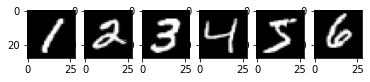

In [ ]:
plt.subplot(161)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(162)
plt.imshow(x_train[5], cmap=plt.get_cmap('gray'))
plt.subplot(163)
plt.imshow(x_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(164)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(165)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(166)
plt.imshow(x_train[13], cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
# Normalize input
x_train = x_train / 255
x_test = x_test /255

# One-Hot Encode output
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = 10

In [ ]:
x_train_simple = x_train.reshape(60000, 28, 28, 1).astype('float')
x_test_simple = x_test.reshape(10000, 28, 28, 1).astype('float')

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28 , 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               409856    
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [ ]:
model.fit(x_train_simple, y_train,
          validation_data=(x_test_simple, y_test),
          epochs=30,
          batch_size=200,
          verbose=2)

Epoch 1/30
300/300 - 2s - loss: 0.2110 - accuracy: 0.9385 - val_loss: 0.0567 - val_accuracy: 0.9822
Epoch 2/30
300/300 - 2s - loss: 0.0538 - accuracy: 0.9833 - val_loss: 0.0417 - val_accuracy: 0.9860
Epoch 3/30
300/300 - 2s - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0340 - val_accuracy: 0.9884
Epoch 4/30
300/300 - 2s - loss: 0.0270 - accuracy: 0.9915 - val_loss: 0.0282 - val_accuracy: 0.9904
Epoch 5/30
300/300 - 2s - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0238 - val_accuracy: 0.9911
Epoch 6/30
300/300 - 2s - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.0340 - val_accuracy: 0.9882
Epoch 7/30
300/300 - 2s - loss: 0.0125 - accuracy: 0.9961 - val_loss: 0.0287 - val_accuracy: 0.9902
Epoch 8/30
300/300 - 2s - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.0273 - val_accuracy: 0.9912
Epoch 9/30
300/300 - 2s - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0370 - val_accuracy: 0.9890
Epoch 10/30
300/300 - 2s - loss: 0.0076 - accuracy: 0.9975 - val_loss: 0.0260 - val_accuracy: 0.9918

In [ ]:
model.save("model.h5")

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 61kB 1.7MB/s 
     |████████████████████████████████| 137.3MB 89kB/s 
     |████████████████████████████████| 92kB 10.4MB/s 
     |████████████████████████████████| 460kB 39.9MB/s 
     |████████████████████████████████| 256kB 41.6MB/s 
     |████████████████████████████████| 921kB 43.5MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=abd3be6d894f9b39b6453fa16e3f7f2cbb95137460cb1f0939b781e90a70440d
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygmen

In [ ]:
!tensorflowjs_converter --input_format keras '/content/model.h5' '/content/model'